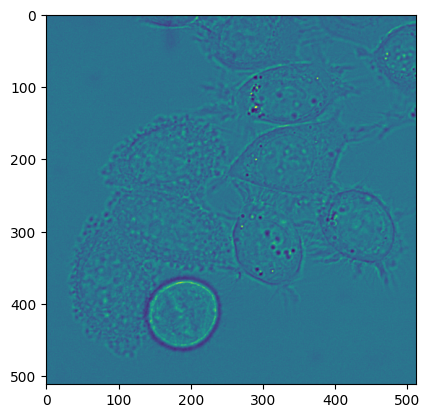

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

a = np.array(Image.open("DIC-C2DH-HeLa_t010.tif"))

plt.imshow(a)

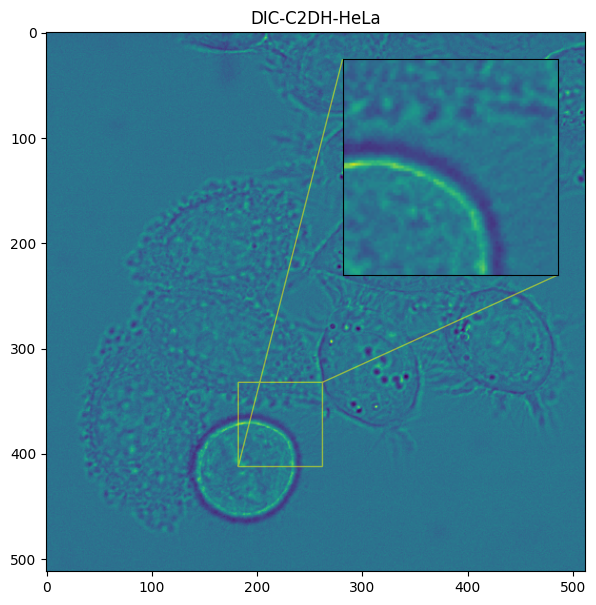

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# load your image
a = np.array(Image.open("DIC-C2DH-HeLa_t010.tif"))

h, w = a.shape[:2]   # image height, width

fig, ax = plt.subplots(figsize=(10, 7))

# main image
ax.imshow(a, origin="upper")   # default orientation
ax.set_title("DIC-C2DH-HeLa")

# --- define bottom-right region (in data coords) ---
side = 80                      # size of zoomed square in pixels
x1, x2 = w - side - 250, w - 250
y1, y2 = h - side - 100, h - 100

# inset Axes...
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4])  # [left, bottom, width, height] in axes fraction
axins.imshow(a, origin="upper")

# set the zoomed region
axins.set_xlim(x1, x2)
# because origin="upper", y increases downward → invert limits for correct display
axins.set_ylim(y2, y1)

axins.set_xticks([])
axins.set_yticks([])

# draw connecting box & lines
ax.indicate_inset_zoom(axins, edgecolor="yellow")

fig.savefig("DIC-C2DH-HeLa.pdf")

## New

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


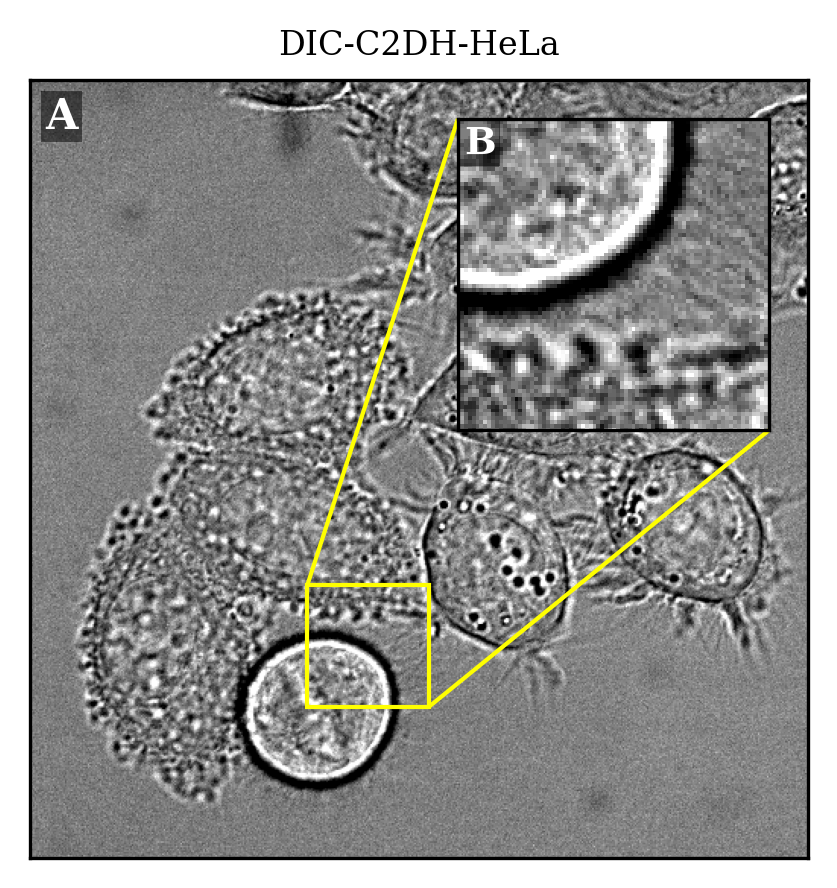

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- global style (adjust to match your thesis) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# --- load image ---
a = np.array(Image.open("DIC-C2DH-HeLa_t010.tif"))
h, w = a.shape[:2]

# gentle contrast stretch
vmin, vmax = np.percentile(a, (1, 99))

# --- figure & main axes ---
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

ax.imshow(a, origin="upper", cmap="gray", vmin=vmin, vmax=vmax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("DIC-C2DH-HeLa", pad=6)

# panel label for main image
ax.text(
    0.02, 0.98, "A",
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=10, fontweight="bold",
    color="white",
    bbox=dict(boxstyle="square,pad=0.1", fc="black", ec="none", alpha=0.5),
)

# --- define bottom-right region ---
side = 80
x1, x2 = w - side - 250, w - 250
y1, y2 = h - side - 100, h - 100

# --- inset axes ---
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4])  # [left, bottom, width, height]
axins.imshow(a, origin="upper", cmap="gray", vmin=vmin, vmax=vmax)

#axins.set_xlim(x1, x2)
#axins.set_ylim(y2, y1)  # inverted because origin="upper"
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)       # <--- no inversion here

axins.set_xticks([])
axins.set_yticks([])

# panel label for inset
axins.text(
    0.02, 0.98, "B",
    transform=axins.transAxes,
    ha="left", va="top",
    fontsize=9, fontweight="bold",
    color="white",
    bbox=dict(boxstyle="square,pad=0.1", fc="black", ec="none", alpha=0.5),
)

# connecting box & lines
mark_inset(ax, axins, loc1=4, loc2=2, fc="none", ec="yellow", lw=1)



plt.tight_layout()
fig.savefig("DIC-C2DH-HeLa.pdf", bbox_inches="tight")

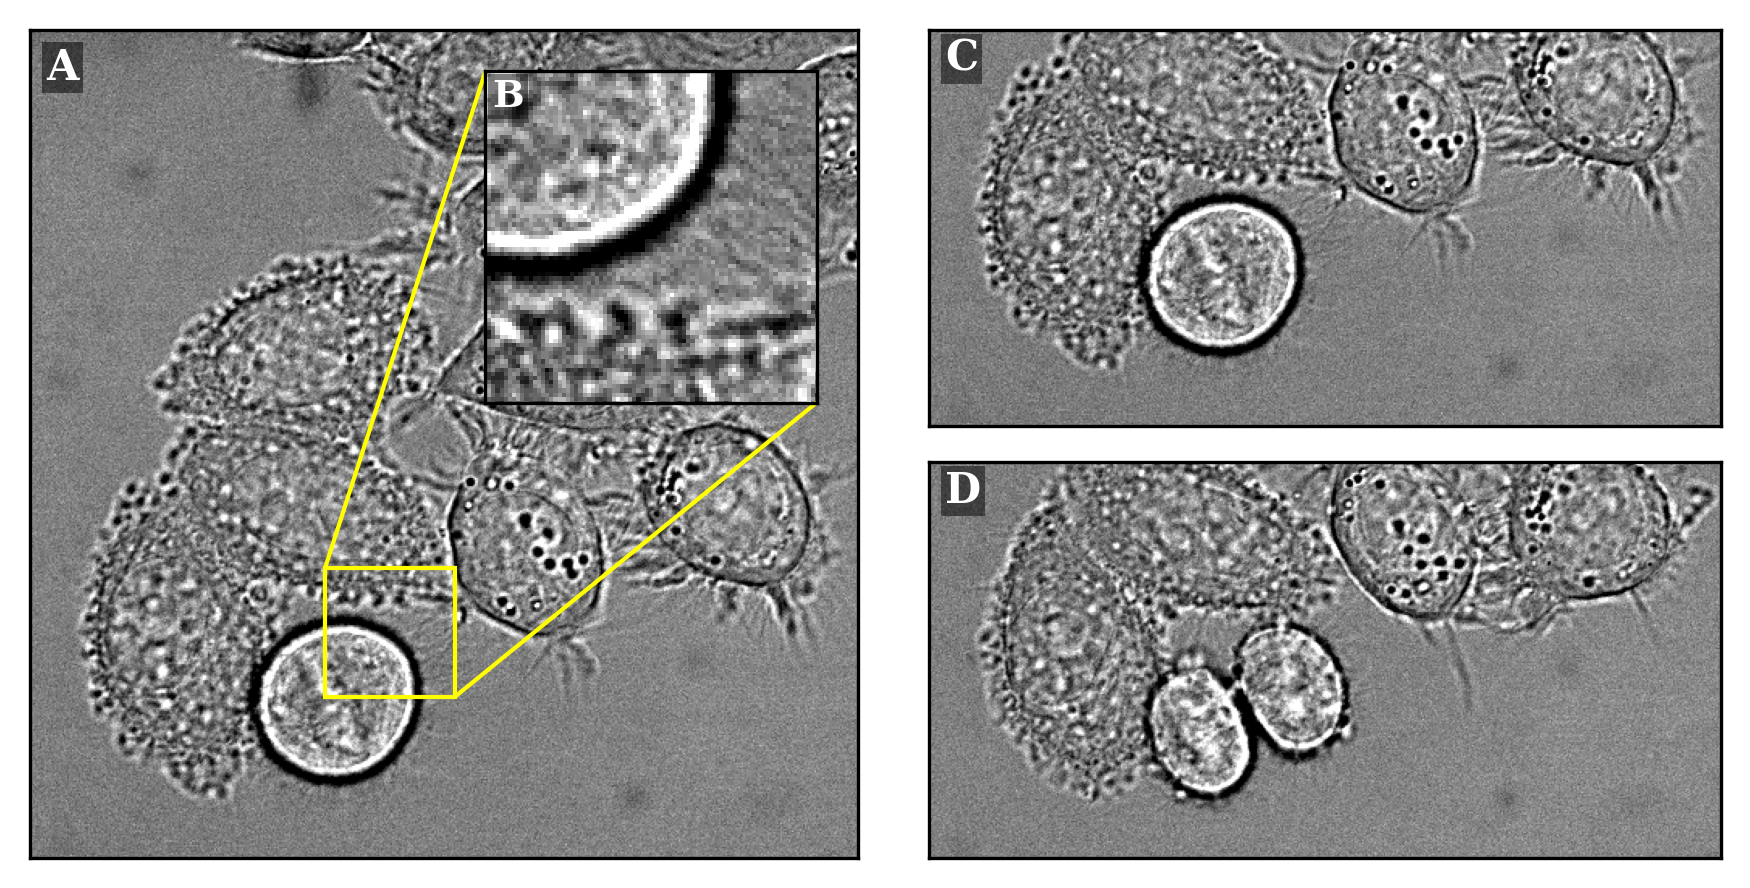

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# ------------------------------------------------------------
# LOAD IMAGE
# ------------------------------------------------------------
a = np.array(Image.open("DIC-C2DH-HeLa_t010.tif"))
b = np.array(Image.open("DIC-C2DH-HeLa_t011.tif"))
h, w = a.shape[:2]

vmin, vmax = np.percentile(a, (1, 99))

# bottom half of image A
bottom_half = a[h//2:, :], b[h//2:, :]

# ------------------------------------------------------------
# GLOBAL STYLE
# ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})

# ------------------------------------------------------------
# FIGURE WITH 3 PANELS (LEFT BIG + TWO SMALL RIGHT)
# ------------------------------------------------------------
fig = plt.figure(figsize=(6, 3), dpi=300)

# big panel on the left
ax_main = fig.add_subplot(1, 2, 1)

# ------------------------------------------------------------
# MAIN FULL IMAGE (PANEL A)
# ------------------------------------------------------------
ax_main.imshow(a, origin="upper", cmap="gray", vmin=vmin, vmax=vmax)
ax_main.set_xticks([])
ax_main.set_yticks([])

ax_main.text(
    0.02, 0.98, "A",
    transform=ax_main.transAxes,
    ha="left", va="top",
    fontsize=10, fontweight="bold",
    color="white",
    bbox=dict(boxstyle="square,pad=0.1", fc="black", ec="none", alpha=0.5),
)

# ------------------------------------------------------------
# INSET INTO THE MAIN PANEL
# ------------------------------------------------------------
side = 80
x1, x2 = w - side - 250, w - 250
y1, y2 = h - side - 100, h - 100

axins = ax_main.inset_axes([0.55, 0.55, 0.40, 0.40])
axins.imshow(a, origin="upper", cmap="gray", vmin=vmin, vmax=vmax)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([])
axins.set_yticks([])

axins.text(
    0.02, 0.98, "B",
    transform=axins.transAxes,
    ha="left", va="top",
    fontsize=9, fontweight="bold",
    color="white",
    bbox=dict(boxstyle="square,pad=0.1", fc="black", ec="none", alpha=0.5),
)

mark_inset(ax_main, axins, loc1=4, loc2=2, fc="none", ec="yellow", lw=1)

# ------------------------------------------------------------
# RIGHT-SIDE PANELS (BOTTOM HALF OF IMAGE A, TWICE)
# ------------------------------------------------------------
ax_r1 = fig.add_subplot(2, 2, 2)
ax_r2 = fig.add_subplot(2, 2, 4)

idx = 0
for ax, label in [(ax_r1, "C"), (ax_r2, "D")]:
    ax.imshow(bottom_half[idx], origin="upper", cmap="gray", vmin=vmin, vmax=vmax)
    idx += 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(
        0.02, 0.98, label,
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=10, fontweight="bold",
        color="white",
        bbox=dict(boxstyle="square,pad=0.1", fc="black", ec="none", alpha=0.5),
    )

# ------------------------------------------------------------
# SAVE
# ------------------------------------------------------------
plt.tight_layout()
fig.savefig("combined_figure_dic.pdf", bbox_inches="tight")
